In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../input/mall-customers-data-set/Mall_Customers.csv")
df.rename(columns = { 
    'Annual Income (k$)': 'Annual Income', 
    'Spending Score (1-100)': 'Spending Score'
}, inplace = True)
df.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_features = df[['Genre', 'Age', 'Annual Income', 'Spending Score']]
customer_features.head()

,Genre,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [4]:
customer_features = pd.get_dummies(customer_features, columns= ['Genre'])
customer_features['cluster'] = 0
customer_features.head()

,Age,Annual Income,Spending Score,Genre_Female,Genre_Male,cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,0
3,23,16,77,1,0,0
4,31,17,40,1,0,0


# Euclidean Distance

In [5]:
def Euclidean_distance(point1, point2):
    distance = 0
    for col in customer_features.columns:
        distance += np.square(point1[col]-point2[col])
    return np.sqrt(distance)

# Select Centroids

In [6]:
def select_centroids(k):
    random_centroids = np.random.randint(0, 200, k)
    centroids_list = []
    for i in range(k):
        centroids_list.append(customer_features.iloc[random_centroids[i]])
    return centroids_list

# K_Mean

In [7]:
def K_Mean(k):
    centroids = select_centroids(k)
    for i in range(100):
        for index in range(customer_features.shape[0]):
            selected_distance = np.inf
            selected_cluster = 0
            for i in range(k):
                dist = Euclidean_distance(customer_features.iloc[index], centroids[i])
                if dist<selected_distance:
                    selected_distance = dist
                    selected_cluster=(i+1)
            customer_features['cluster'][index] = selected_cluster
        for j in range(k):
            centroids[j] = np.mean(customer_features[customer_features['cluster']==(j+1)], axis=0)   
    return centroids

# Calculations

In [8]:
k = int(input('Enter Value of K: '))
selected_centroids = K_Mean(k)
for i in range(k):
    print('Cluster',i+1,':',customer_features[customer_features['cluster']==(i+1)].shape[0])

Enter Value of K:  3


Cluster 1 : 38
Cluster 2 : 123
Cluster 3 : 39


# Centroids

In [9]:
pd.DataFrame(selected_centroids)

,Age,Annual Income,Spending Score,Genre_Female,Genre_Male,cluster
0,40.394737,87.000000,18.631579,0.473684,0.526316,1.0
1,40.325203,44.154472,49.829268,0.593496,0.406504,2.0
2,32.692308,86.538462,82.128205,0.538462,0.461538,3.0


### Just Plotting Graph For 2-Dim

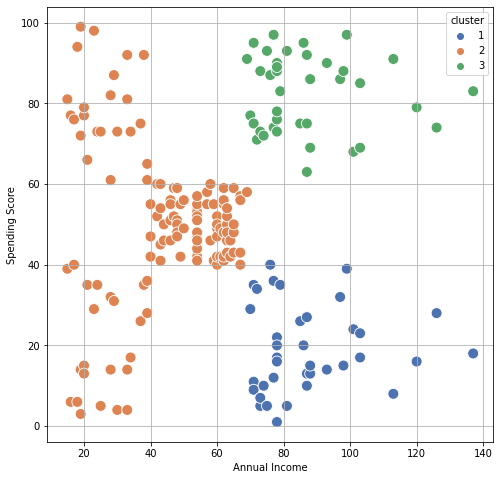

In [10]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=customer_features, x='Annual Income', y='Spending Score', hue='cluster', palette="deep", s=120)
plt.grid(True)
plt.show()